# Warehouse Visaulization
Data from Storytelling with data makeover: https://www.youtube.com/watch?v=st7_vPjq0SU.

I recreated the visualization they created using Python and matplotlib. I made some slight modifications.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib


## Set outpath for saved images
outpath = os.getcwd() + "\\images"

## Import Data 

In [3]:
raw_df = pd.read_excel('Warehouse.xlsx')
raw_df

,Warehouse ID,Location,Errors,Accuracy,Null,Grand Total,Error rate,Accuracy rate,Null.1,Total
0,1,South,80,691,32,803,0.10,0.86,0.04,1
1,2,Northeast,121,692,52,865,0.14,0.80,0.06,1
2,3,Northeast,80,668,48,795,0.10,0.84,0.06,1
3,4,Northeast,96,560,27,683,0.14,0.82,0.04,1
4,5,Northeast,57,487,23,566,0.10,0.86,0.04,1
5,6,Northeast,94,469,23,586,0.16,0.80,0.04,1
6,7,West,77,408,26,510,0.15,0.80,0.05,1
7,8,South,26,405,4,436,0.06,0.93,0.01,1
8,9,West,46,368,4,418,0.11,0.88,0.01,1
9,10,Northeast,25,317,22,364,0.07,0.87,0.06,1


## Prepare Data 

In [204]:
def prep_data(_df):
    
    ## Set values in a column that will color the graph bars
    red_error_color = '#dd5757'
    error_gray_color = 'whitesmoke'
    
    ## Clean columns by replacing spaces with underscores, change Null.1 to null_pct
    def clean_columns(cols):
        return cols.replace(' ','_').replace('Null.1','null_pct').lower()
    
    ## modify the dataframe
    tmp_df=(_df
            .drop(columns = ['Null'])
            .rename(columns=clean_columns)
            .drop(columns = ['errors', 'accuracy', 'grand_total', 'total'])
            .assign(error_rate=lambda df: round(df.error_rate * 100),
                    accuracy_rate=lambda df: round(df.accuracy_rate * 100),
                    null_pct=lambda df:round(df.null_pct * 100, ndigits=0),
                    checkTotal_pct = lambda df: df[['error_rate','accuracy_rate','null_pct']].sum(axis = 1),
                    error_lt_mean_color = lambda df:  np.where(df['error_rate'] < df.error_rate.mean(), error_gray_color, red_error_color)
            )
            .astype({'error_rate':'int32', 
                     'accuracy_rate':'int32', 
                     'null_pct':'int32',
                     'checkTotal_pct':'int32'})
            .sort_values(['error_rate','warehouse_id'])
            .reset_index(drop=True)
    )
    
    return tmp_df


## REMOVE THE ALL COLUMN. I DON'T LIKE IT IN THE VISUAL. I ORIGINALLY STARTED WITH IT. I THINK IT'S CONFUSING KEEPING THAT COLUMN IN THE FINAL VISUAL

#     ## Find the averages of the dataframe above to add a column for all data
#     meanValuesList = (tmp_df[['error_rate', 'accuracy_rate', 'null_pct']]
#                       .mean()
#                       .round(decimals=0)
#                       .to_list())
    
#     ## Append the average error rate, accuracy rate, null pct to the row data tmp_df
#     append_ALL = pd.DataFrame({'warehouse_id':['ALL'], 
#                                'location':['ALL'], 
#                                'error_rate':[meanValuesList[0]], 
#                                'accuracy_rate':[meanValuesList[1]],
#                                'null_pct':[meanValuesList[2]],
#                                'checkTotal_pct': sum(meanValuesList),
#                                'error_lt_mean_color':['black']})
#     df = pd.concat([tmp_df,append_ALL]) 
    
    
#     return (df
#             .astype({'error_rate':'int32', 
#                      'accuracy_rate':'int32', 
#                      'null_pct':'int32',
#                      'checkTotal_pct':'int32'})
#             .sort_values(['error_rate','warehouse_id'])
#             .reset_index(drop=True))

In [205]:
df = prep_data(raw_df)
df

,warehouse_id,location,error_rate,accuracy_rate,null_pct,checkTotal_pct,error_lt_mean_color
0,14,Midwest,4,94,2,100,whitesmoke
1,8,South,6,93,1,100,whitesmoke
2,10,Northeast,7,87,6,100,whitesmoke
3,17,Northeast,7,89,4,100,whitesmoke
4,19,South,7,91,2,100,whitesmoke
5,13,Northeast,8,83,9,100,whitesmoke
6,1,South,10,86,4,100,whitesmoke
7,3,Northeast,10,84,6,100,whitesmoke
8,5,Northeast,10,86,4,100,whitesmoke
9,18,South,10,88,2,100,whitesmoke


In [206]:
## Function to add data tips to warehouses that have an error rate greater than the average
def add_data_tips(_df):
    _series =  _df.loc[_df.error_rate.ge(_df.error_rate.mean()),'error_rate']
    for i in _series.index:
        ax.text(97, i, str(_series.loc[i]) + '%', 
                horizontalalignment='center',
                verticalalignment='center', 
                fontdict={'color':'white','weight':'bold'})

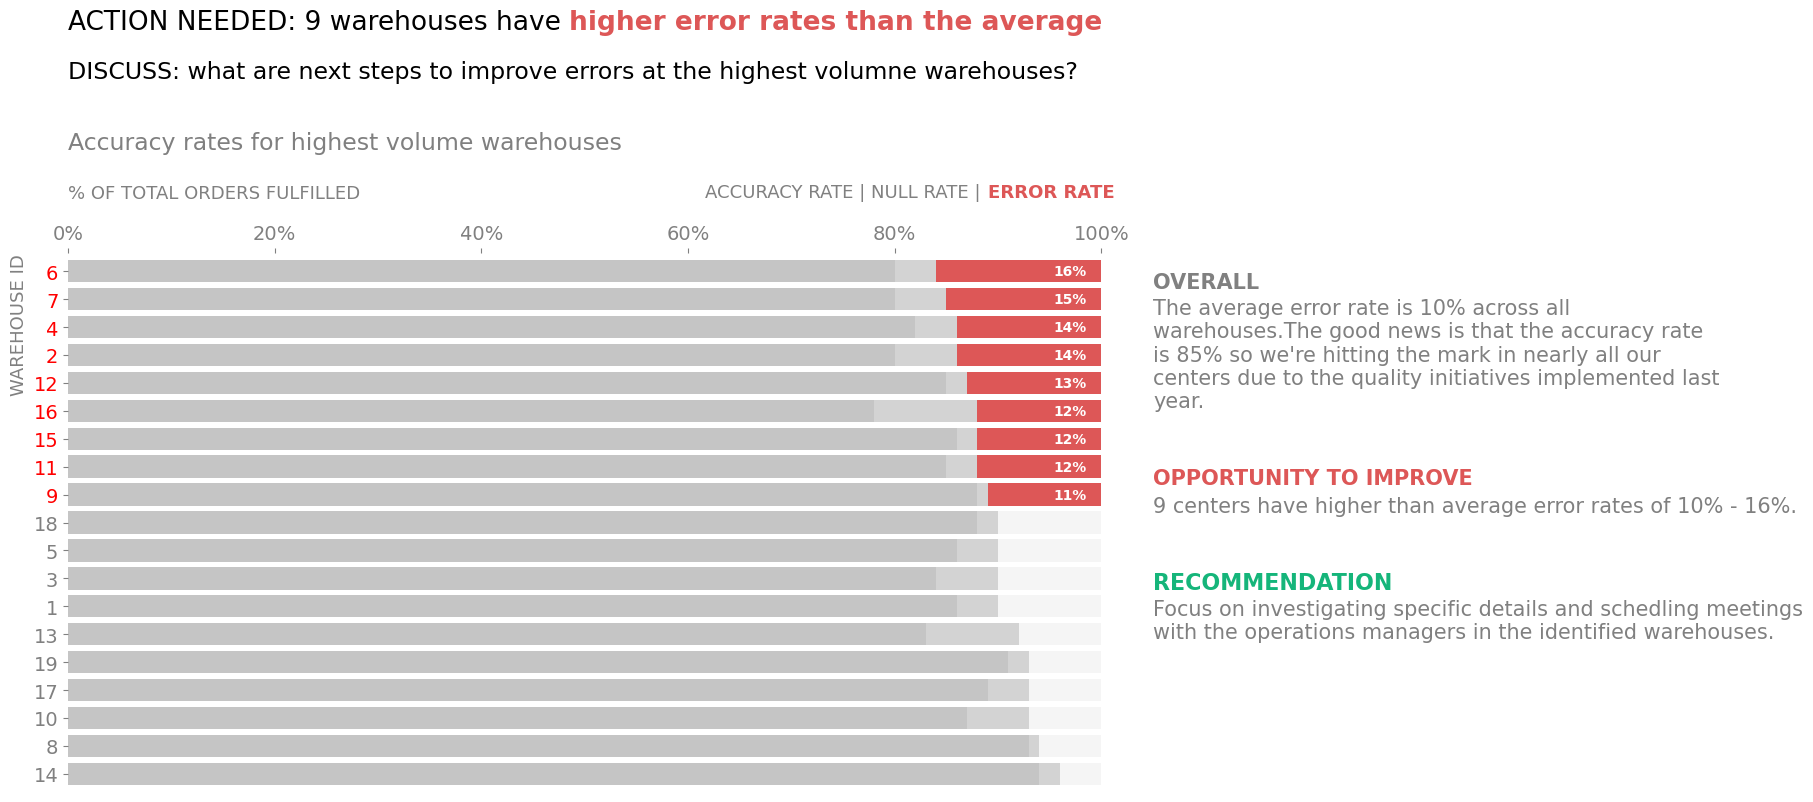

In [207]:
## Modify visualization appearance
matplotlib.style.use('default')
ticklabelSize=14
titleTextSize=17
axesLabelSize=13
textColor='gray'
bar_width = .8
red_error_color = '#dd5757'
gree_recommendation_color = '#15b57a'

plt.rcParams['xtick.labelsize']=ticklabelSize
plt.rcParams['ytick.labelsize']=ticklabelSize
plt.rcParams['xtick.color']=textColor
plt.rcParams['ytick.color']=textColor
plt.rcParams['axes.labelsize']=axesLabelSize
plt.rcParams['axes.labelcolor']=textColor

plt.rcParams['axes.titlecolor']=textColor
spines = ['axes.spines.bottom', 'axes.spines.left', 'axes.spines.right', 'axes.spines.top']
for spine in spines:
    plt.rcParams[spine] = False
    


##########
## PLOT ##
##########
fig, ax = plt.subplots(figsize=(14,7))

df.plot.barh(x='warehouse_id', y='accuracy_rate', label='Accuracy Rate', ax=ax, 
             color='#C5C5C5', 
             width = bar_width)
df.plot.barh(x='warehouse_id', y='null_pct', label='Null Rate', ax=ax, 
             left = df.accuracy_rate, 
             color='lightgrey',  
             width = bar_width)
df.plot.barh(x='warehouse_id', y='error_rate', label='Error Rate', ax=ax, 
             left = df.accuracy_rate + df.null_pct, 
             color = df.error_lt_mean_color.to_list(), 
             width = bar_width)

ax.set_title('Accuracy rates for highest volume warehouses\n', loc='left', fontdict={'fontsize':titleTextSize})
ax.get_legend().remove()


ax.set_ylabel('WAREHOUSE ID', loc='top')
for i in range(10,19):
    ax.get_yticklabels()[i].set_color('red')

ax.xaxis.tick_top()
ax.set_xlabel('% OF TOTAL ORDERS FULFILLED\n', loc='left')
ax.xaxis.set_label_position('top') 
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

add_data_tips(df)

fig.text(.58,.96, 'ACCURACY RATE | NULL RATE |', fontdict={'size':13,
                                                           'color':textColor});
fig.text(.782,.96, 'ERROR RATE', fontdict={'size':13, 
                                           'color':red_error_color,
                                           'weight':'bold'});
##############
## Annotate ##
##############
## Action Needed
actionTextSize = 19
fig.text(.125,1.20,'ACTION NEEDED: 9 warehouses have ', fontdict={'fontsize':actionTextSize, 'color':'black'})
fig.text(.483,1.20, 'higher error rates than the average',fontdict={'fontsize':actionTextSize, 'color':red_error_color, 'weight':'bold'})

## Dicuss
fig.text(.125,1.13,'DISCUSS: what are next steps to improve errors at the highest volumne warehouses? ', fontdict={'fontsize':actionTextSize-2, 'color':'black'})

## Overall
fig.text(.9,.83,"OVERALL", fontdict={'fontsize':actionTextSize - 4, 'color':textColor, 'weight':'bold'})
fig.text(.9,.66,"The average error rate is 10% across all\nwarehouses.The good news is that the accuracy rate\nis 85% so we're hitting the mark in nearly all our\ncenters due to the quality initiatives implemented last\nyear.",
        fontdict={'fontsize':actionTextSize - 4, 'color':textColor})


## Opportunity
# fig.text(.9,.55,"OPPORTUNITY TO IMPROVE: 9 centers have higher than\naverage error rates of 10% - 16%. ",
#         fontdict={'fontsize':actionTextSize - 4, 'color':textColor})
fig.text(.9,.55,"OPPORTUNITY TO IMPROVE", fontdict={'fontsize':actionTextSize - 4, 'color':red_error_color, 'weight':'bold'})
fig.text(.9,.51,"9 centers have higher than average error rates of 10% - 16%. ",
        fontdict={'fontsize':actionTextSize - 4, 'color':textColor})

## Recommendation
fig.text(.9,.4,"RECOMMENDATION", fontdict={'fontsize':actionTextSize - 3, 'color':gree_recommendation_color, 'weight':'bold'})
fig.text(.9,.33,"Focus on investigating specific details and schedling meetings\nwith the operations managers in the identified warehouses. ",
        fontdict={'fontsize':actionTextSize - 4, 'color':textColor})


## Save image ##
fig.savefig('images/warehouse_recommendations.png', bbox_inches = "tight") ##DPI=300